In [25]:
import sys
sys.path.append('..')

from src.dataloader import MRI2D, Clevr
from src.config.load_config import load_config
import numpy as np
import torch.nn
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd

In [37]:
d = MRI2D('src/config/2DMRI_config.yml')

config = load_config('/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning/src/config/clevr_config.yml') 

d2 = Clevr(config)

[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/unsupervised-learning-of-energy-representations/unsupervised-learning-of-energy-representations/e/UN-208


In [29]:
pth = '/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning/data/*.npy'

# Load all the files from the path into a list
files = np.array(glob.glob(pth))

# Load all the files into a list
data = [np.load(f) for f in files]


# convert the list of arrays into pandas dataframe




In [33]:
data[20]

array([[  0.     ,   0.     ,   0.     , ..., 145.38525, 116.86256,
        122.92365],
       [  0.     ,   0.     ,   0.     , ..., 151.679  , 149.50995,
        106.44664],
       [  0.     ,   0.     ,   0.     , ..., 141.6703 , 147.71361,
        136.41548],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)

<Axes: ylabel='Count'>

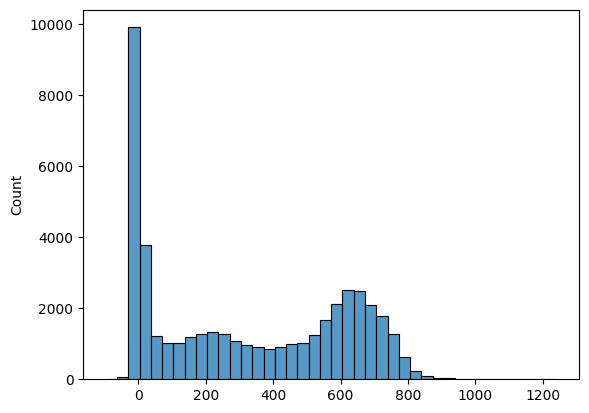

In [24]:
sns.histplot(data[0].flatten())

<Axes: ylabel='Count'>

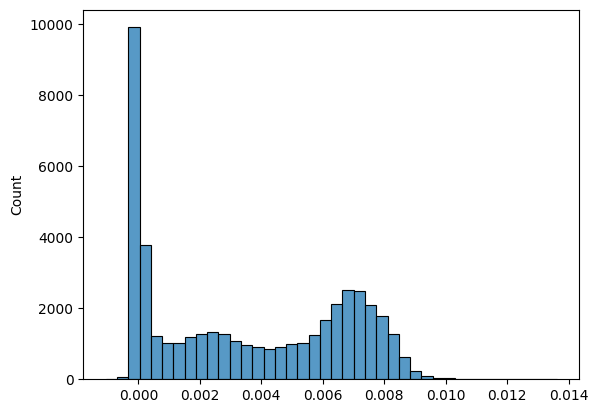

In [23]:
sns.histplot(torch.nn.functional.normalize(torch.tensor(data[0].flatten().astype(float).reshape(1, -1)), p=2, dim=1).flatten())


In [35]:
import numpy as np

# Load your MRI scan (example from data[20])
img = data[20]

def normalize(img):
    # Get nonzero values
    nonzero_mask = img > 0  # Boolean mask for nonzero elements

    # Normalize only nonzero values to range [0, 1]
    img_min = np.min(img[nonzero_mask])  # Min of nonzero values
    img_max = np.max(img[nonzero_mask])  # Max of nonzero values
    img_norm = np.zeros_like(img)  # Keep zeros as they are
    img_norm[nonzero_mask] = (img[nonzero_mask] - img_min) / (img_max - img_min)

    return img_norm

for i in range(len(data)):
    data[i] = normalize(data[i])
    



In [45]:
d.__getitem__(20)[0].shape

torch.Size([3, 64, 64])